In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community.asyn_fluid import asyn_fluidc
from random import sample, shuffle, choice

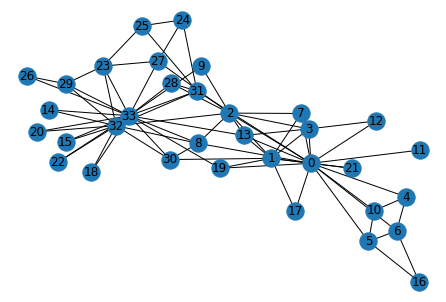

In [18]:
G = nx.karate_club_graph()
pos = nx.drawing.layout.spring_layout(G)
nx.draw(G, pos=pos, with_labels=True)

# Fluid Communities Algorithm
Based on https://arxiv.org/pdf/1703.09307.pdf

In [21]:
def fluidC(G, k):
    assert k <= len(list(G.nodes()))
    flag = True
    
    init = sample(list(G.nodes()), k)
    groups = [[i] for i in init]
    dens = [1 for i in init]
    communities = dict()
    for i, x in enumerate(init):
        communities[x] = i
    tmp = list(G.nodes())
    epoch = 0
    
    while flag:
        epoch += 1
        flag = False
        shuffle(tmp)

        for node in tmp:
            neigh = list(G.neighbors(node))
            neigh.append(node)
            max_sum = 0
            max_arg = []
            
            for i in range(k):
                this_sum = 0
                for n in neigh:
                    if n in communities.keys() and communities[n] == i: 
                        this_sum += dens[i]
                if this_sum != 0 and this_sum == max_sum:
                    max_arg.append(i)
                elif this_sum > max_sum:
                    max_sum = this_sum
                    max_arg = [i]
                    
            if len(max_arg) > 0:
                if node in communities.keys() and communities[node] not in max_arg:
                    # change community of the node
                    old_com = communities[node]
                    new_com = choice(max_arg)
                    communities[node] = new_com
                    groups[old_com].remove(node)
                    groups[new_com].append(node)
                    
                    # update densities
                    dens[old_com] = 1/len(groups[old_com])
                    dens[new_com] = 1/len(groups[new_com])
                    
                    # update flag - a change's been made
                    flag = True
                    
                elif node not in communities.keys():
                    # add community to the node
                    com = choice(max_arg)
                    communities[node] = com
                    groups[com].append(node)
                    
                    # update density
                    dens[com] = 1/len(groups[com])
                    
                    # update flag - a change's been made
                    flag = True
        print('Superstep number:', epoch)
        print(groups)
    return groups, communities

In [30]:
node_groups, _ = fluidC(G,2)

Superstep number: 1
[[17, 1, 13, 19, 30, 0], [28, 31, 2, 32, 20, 8, 27, 25, 29, 22, 33, 23]]
Superstep number: 2
[[17, 1, 13, 19, 0, 2, 3, 5, 16, 11, 4, 6, 10, 7, 12, 21, 9], [28, 31, 32, 20, 8, 27, 25, 29, 22, 33, 23, 14, 18, 15, 30, 26, 24]]
Superstep number: 3
[[17, 1, 13, 19, 0, 2, 3, 5, 16, 11, 4, 6, 10, 7, 12, 21, 9], [28, 31, 32, 20, 8, 27, 25, 29, 22, 33, 23, 14, 18, 15, 30, 26, 24]]


# Comparison of my and NetworkX implementations

[[17, 1, 13, 19, 0, 2, 3, 5, 16, 11, 4, 6, 10, 7, 12, 21, 9], [28, 31, 32, 20, 8, 27, 25, 29, 22, 33, 23, 14, 18, 15, 30, 26, 24]]


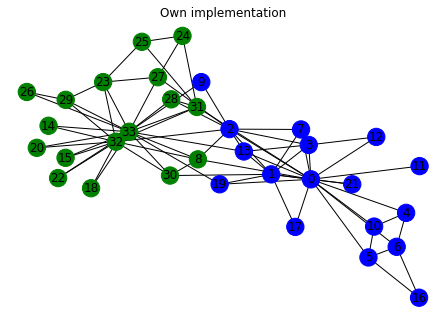

In [31]:
print(node_groups)

color_map = []
colors = ['b','g','y','r','k','c','m']
for node in G:
    for i in range(len(node_groups)):
        if node in node_groups[i]:
            color_map.append(colors[i])
nx.draw(G, node_color=color_map, with_labels=True, pos=pos)
plt.title('Own implementation')
plt.show()

Superstep number: 1
[[8, 33, 29, 30, 9, 20, 31, 2, 32, 28, 13, 15, 23], [0, 5, 12, 17, 11, 10, 16, 1, 7, 21, 4, 19, 3, 6]]
Superstep number: 2
[[8, 33, 29, 30, 9, 20, 31, 2, 32, 28, 15, 23, 27, 22, 14, 26, 25, 18, 24], [0, 5, 12, 17, 11, 10, 16, 1, 7, 21, 4, 19, 3, 6, 13]]
Superstep number: 3
[[8, 33, 29, 30, 9, 20, 31, 32, 28, 15, 23, 27, 22, 14, 26, 25, 18, 24], [0, 5, 12, 17, 11, 10, 16, 1, 7, 21, 4, 19, 3, 6, 13, 2]]
Superstep number: 4
[[8, 33, 29, 30, 9, 20, 31, 32, 28, 15, 23, 27, 22, 14, 26, 25, 18, 24], [0, 5, 12, 17, 11, 10, 16, 1, 7, 21, 4, 19, 3, 6, 13, 2]]


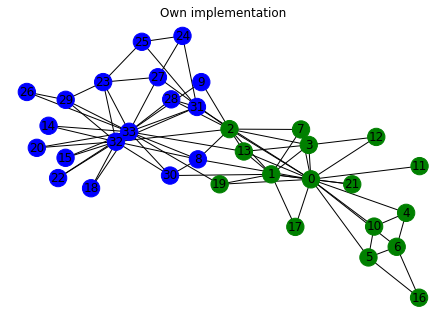

In [33]:
node_groups, _ = fluidC(G,2)
color_map = []
colors = ['b','g','y','r','k','c','m']
for node in G:
    for i in range(len(node_groups)):
        if node in node_groups[i]:
            color_map.append(colors[i])
nx.draw(G, node_color=color_map, with_labels=True, pos=pos)
plt.title('Own implementation')
plt.show()

Superstep number: 1
[[11, 0, 31, 21, 33, 26, 8, 28, 14, 23, 24, 12, 7, 10, 2, 17, 13, 19, 15, 20, 9], [6, 4, 16, 5]]
Superstep number: 2
[[11, 31, 21, 33, 26, 8, 28, 14, 23, 24, 12, 7, 2, 13, 19, 15, 20, 9, 3, 29, 1, 30, 32, 18, 25, 27, 22], [6, 4, 16, 5, 10, 0, 17]]
Superstep number: 3
[[31, 33, 26, 8, 28, 14, 23, 24, 7, 2, 13, 19, 15, 20, 9, 3, 29, 1, 30, 32, 18, 25, 27, 22], [6, 4, 16, 5, 10, 0, 17, 21, 11, 12]]
Superstep number: 4
[[31, 33, 26, 8, 28, 14, 23, 24, 7, 2, 19, 15, 20, 9, 3, 29, 30, 32, 18, 25, 27, 22], [6, 4, 16, 5, 10, 0, 17, 21, 11, 12, 1, 13]]
Superstep number: 5
[[31, 33, 26, 8, 28, 14, 23, 24, 2, 15, 20, 9, 29, 30, 32, 18, 25, 27, 22], [6, 4, 16, 5, 10, 0, 17, 21, 11, 12, 1, 13, 19, 7, 3]]
Superstep number: 6
[[31, 33, 26, 8, 28, 14, 23, 24, 15, 20, 9, 29, 30, 32, 18, 25, 27, 22], [6, 4, 16, 5, 10, 0, 17, 21, 11, 12, 1, 13, 19, 7, 3, 2]]
Superstep number: 7
[[31, 33, 26, 8, 28, 14, 23, 24, 15, 20, 9, 29, 30, 32, 18, 25, 27, 22], [6, 4, 16, 5, 10, 0, 17, 21, 11, 12

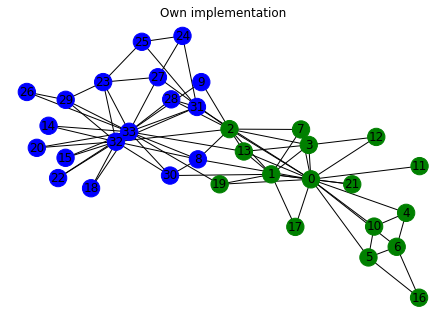

In [34]:
node_groups, _ = fluidC(G,2)
color_map = []
colors = ['b','g','y','r','k','c','m']
for node in G:
    for i in range(len(node_groups)):
        if node in node_groups[i]:
            color_map.append(colors[i])
nx.draw(G, node_color=color_map, with_labels=True, pos=pos)
plt.title('Own implementation')
plt.show()

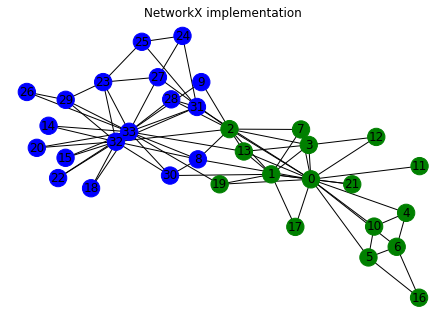

In [35]:
communities = asyn_fluidc(G, 2)

node_groups = []
for com in communities:
    node_groups.append(list(com))

color_map = []
colors = ['b','g','y','r','k','c','m']
for node in G:
    for i in range(len(node_groups)):
        if node in node_groups[i]:
            color_map.append(colors[i])
nx.draw(G, node_color=color_map, with_labels=True, pos=pos)
plt.title('NetworkX implementation')
plt.show()

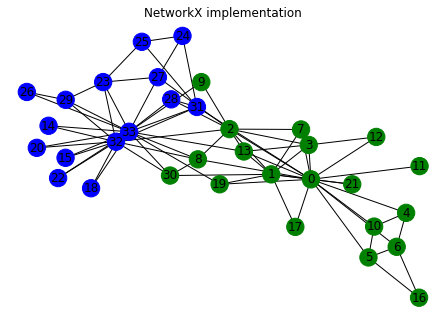

In [36]:
communities = asyn_fluidc(G, 2)

node_groups = []
for com in communities:
    node_groups.append(list(com))

color_map = []
colors = ['b','g','y','r','k','c','m']
for node in G:
    for i in range(len(node_groups)):
        if node in node_groups[i]:
            color_map.append(colors[i])
nx.draw(G, node_color=color_map, with_labels=True, pos=pos)
plt.title('NetworkX implementation')
plt.show()

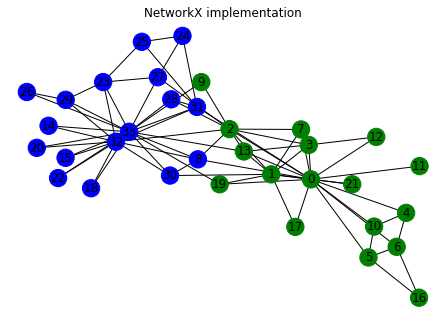

In [45]:
communities = asyn_fluidc(G, 2)

node_groups = []
for com in communities:
    node_groups.append(list(com))

color_map = []
colors = ['b','g','y','r','k','c','m']
for node in G:
    for i in range(len(node_groups)):
        if node in node_groups[i]:
            color_map.append(colors[i])
nx.draw(G, node_color=color_map, with_labels=True, pos=pos)
plt.title('NetworkX implementation')
plt.show()

# Testing for greater number of clusters

In [46]:
def adj_erdos_renyi_i(adj, N, p, l, k):   
    for i in range(l, l+N):
        for j in range(k+(i%N), k+N):
            tmp = np.random.uniform()
            tmp = 1 if tmp < p else 0
            adj[i, j], adj[j, i] = tmp, tmp
    return adj

def community_erdos_renyi(n, N, pi, po):
    '''
    n - community number
    N - number of members within each community
    pi - probability of connection within community
    po - probability of connection between communities
    '''
    adj = np.zeros((N*n, N*n))
    for i in range(n):
        for j in range(n):
            p = pi if i == j else po
            adj = adj_erdos_renyi_i(adj, N, p, i*N, j*N)
    g = nx.convert_matrix.from_numpy_matrix(adj)
    plt.figure(figsize=(15,7))
    pos = nx.drawing.layout.spring_layout(g)
    nx.draw(g, pos=pos)
    return g, pos

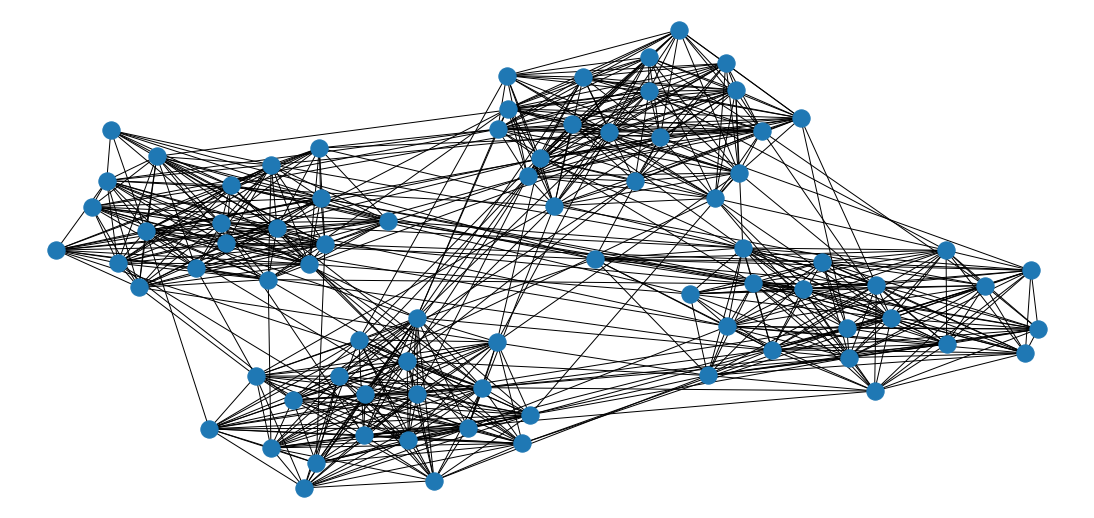

In [47]:
G, pos = community_erdos_renyi(4, 20, 0.8, 0.05)

Superstep number: 1
[[20, 23, 28, 22, 21, 37, 30, 36, 35, 33, 39, 38, 26, 24, 31, 32], [77, 72, 70, 64, 68, 74, 76, 47, 59, 55, 66, 60, 61, 67, 71, 62, 78, 65, 69, 75, 79, 63, 73], [34, 25, 44, 43, 58, 51, 53, 45, 49, 54, 57, 56, 41, 40], [6, 2, 18, 11, 19, 4, 3, 17, 13, 14, 0, 12, 9, 8, 1, 7, 10, 15, 16, 5]]
Superstep number: 2
[[20, 23, 28, 22, 21, 37, 30, 36, 35, 33, 39, 38, 26, 24, 31, 32, 34, 29, 27, 25], [77, 72, 70, 64, 68, 74, 76, 66, 60, 61, 67, 71, 62, 78, 65, 69, 75, 79, 63, 73], [44, 43, 58, 51, 53, 45, 49, 54, 57, 56, 41, 40, 50, 46, 48, 59, 52, 47, 42, 55], [6, 2, 18, 11, 19, 4, 3, 17, 13, 14, 0, 12, 9, 8, 1, 7, 10, 15, 16, 5]]
Superstep number: 3
[[20, 23, 28, 22, 21, 37, 30, 36, 35, 33, 39, 38, 26, 24, 31, 32, 34, 29, 27, 25], [77, 72, 70, 64, 68, 74, 76, 66, 60, 61, 67, 71, 62, 78, 65, 69, 75, 79, 63, 73], [44, 43, 58, 51, 53, 45, 49, 54, 57, 56, 41, 40, 50, 46, 48, 59, 52, 47, 42, 55], [6, 2, 18, 11, 19, 4, 3, 17, 13, 14, 0, 12, 9, 8, 1, 7, 10, 15, 16, 5]]


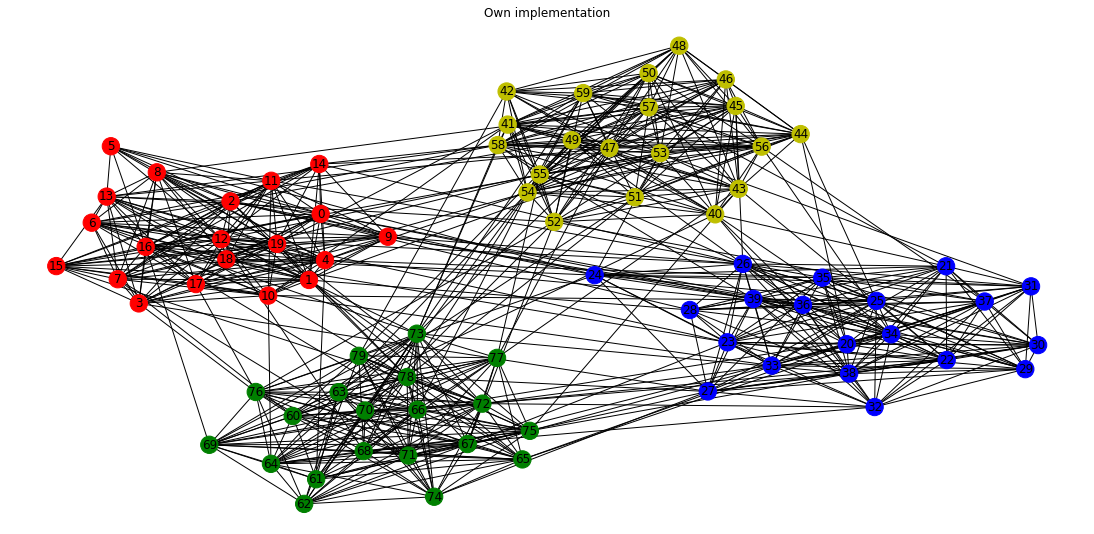

In [49]:
node_groups, _ = fluidC(G,4)
color_map = []
colors = ['b','g','y','r','k','c','m']
for node in G:
    for i in range(len(node_groups)):
        if node in node_groups[i]:
            color_map.append(colors[i])
plt.figure(figsize=(15,7))
nx.draw(G, node_color=color_map, with_labels=True, pos=pos)
plt.title('Own implementation')
plt.show()

Superstep number: 1
[[61, 63, 78, 19, 76, 14, 68, 66, 79, 2, 72, 60, 1, 12, 18, 13, 9, 4, 64, 75, 0, 69, 74, 65, 5, 67, 16, 8, 77, 3, 6, 62, 71, 15, 70, 73], [38, 27, 26, 20, 31, 37, 30, 53, 55, 49, 21, 47, 42, 54, 45, 58, 36, 28, 46, 52, 33, 23, 29, 24, 43, 59, 41, 51, 44, 48, 22, 40, 39, 56, 34, 32, 25, 35]]
Superstep number: 2
[[61, 63, 78, 19, 76, 14, 68, 66, 79, 2, 72, 60, 1, 12, 18, 13, 9, 4, 64, 75, 0, 69, 74, 65, 5, 67, 16, 8, 77, 3, 6, 62, 71, 15, 70, 73, 10, 17, 11, 7], [38, 27, 26, 20, 31, 37, 30, 53, 55, 49, 21, 47, 42, 54, 45, 58, 36, 28, 46, 52, 33, 23, 29, 24, 43, 59, 41, 51, 44, 48, 22, 40, 39, 56, 34, 32, 25, 35, 50, 57]]
Superstep number: 3
[[61, 63, 78, 19, 76, 14, 68, 66, 79, 2, 72, 60, 1, 12, 18, 13, 9, 4, 64, 75, 0, 69, 74, 65, 5, 67, 16, 8, 77, 3, 6, 62, 71, 15, 70, 73, 10, 17, 11, 7], [38, 27, 26, 20, 31, 37, 30, 53, 55, 49, 21, 47, 42, 54, 45, 58, 36, 28, 46, 52, 33, 23, 29, 24, 43, 59, 41, 51, 44, 48, 22, 40, 39, 56, 34, 32, 25, 35, 50, 57]]


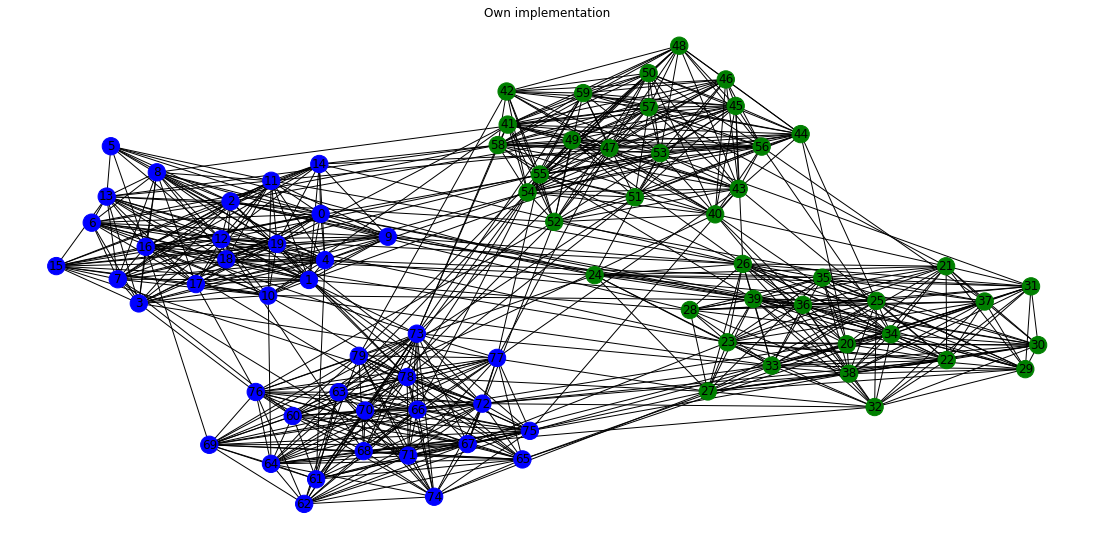

In [51]:
node_groups, _ = fluidC(G,2)
color_map = []
colors = ['b','g','y','r','k','c','m']
for node in G:
    for i in range(len(node_groups)):
        if node in node_groups[i]:
            color_map.append(colors[i])
plt.figure(figsize=(15,7))
nx.draw(G, node_color=color_map, with_labels=True, pos=pos)
plt.title('Own implementation')
plt.show()